In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import os

from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

from PIL import Image
from tensorflow.keras.preprocessing import image

In [70]:
vgg_model = VGG19()
# vgg_model.summary()

In [71]:
vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
layers_name = [layer.name for layer in vgg_layers]
vgg_layer_output = [layer.output for layer in vgg_layers]

# for (i, item) in enumerate(layers_name, start = 0):
#     print(i, item)

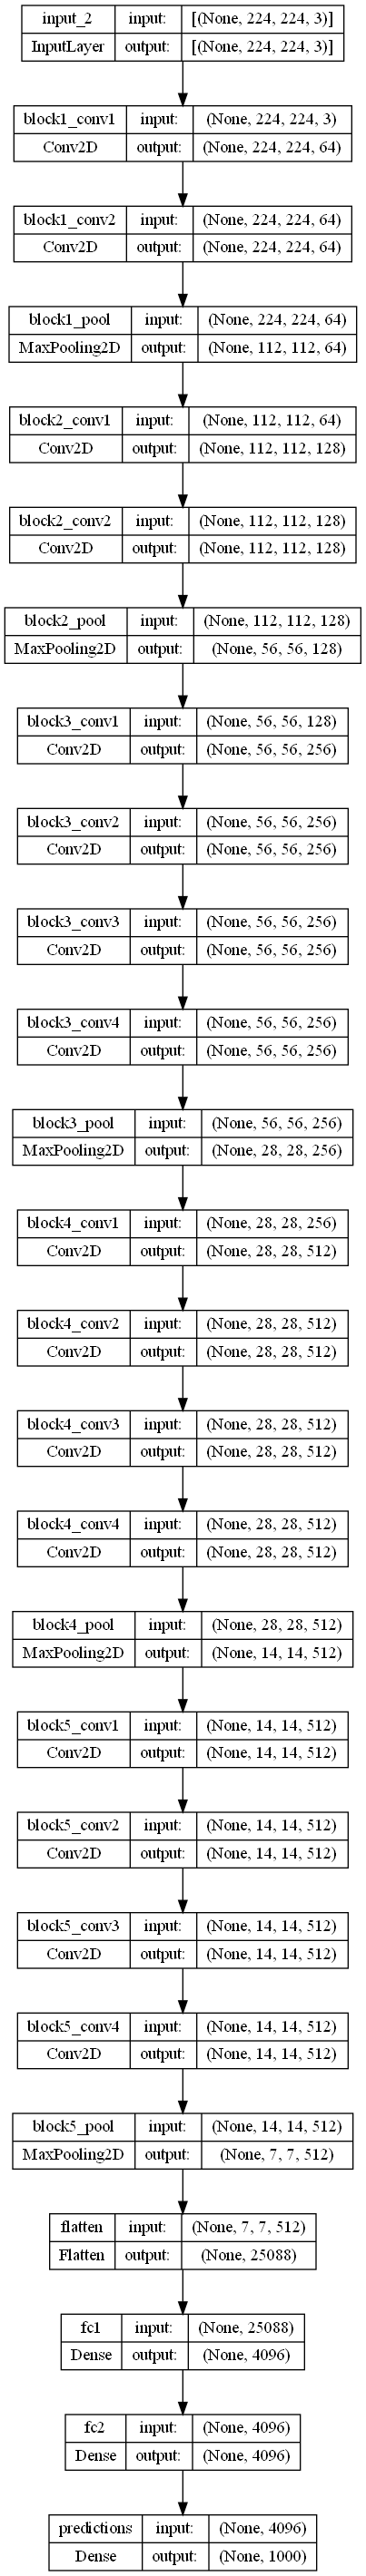

In [72]:
# create a new model based on this model
feature_model = Model(inputs = vgg_input, outputs = vgg_layer_output)
tf.keras.utils.plot_model(feature_model, 'vgg19_model.png', show_shapes = True)

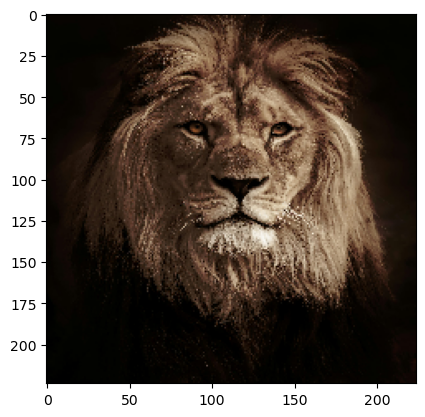

In [73]:
image_path = 'image.jpg'
img = image.load_img(image_path, target_size = (224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [7]:
extracted_feature = feature_model(x)


 f1.shape:  (1, 224, 224, 64) Layer:  block1_conv1


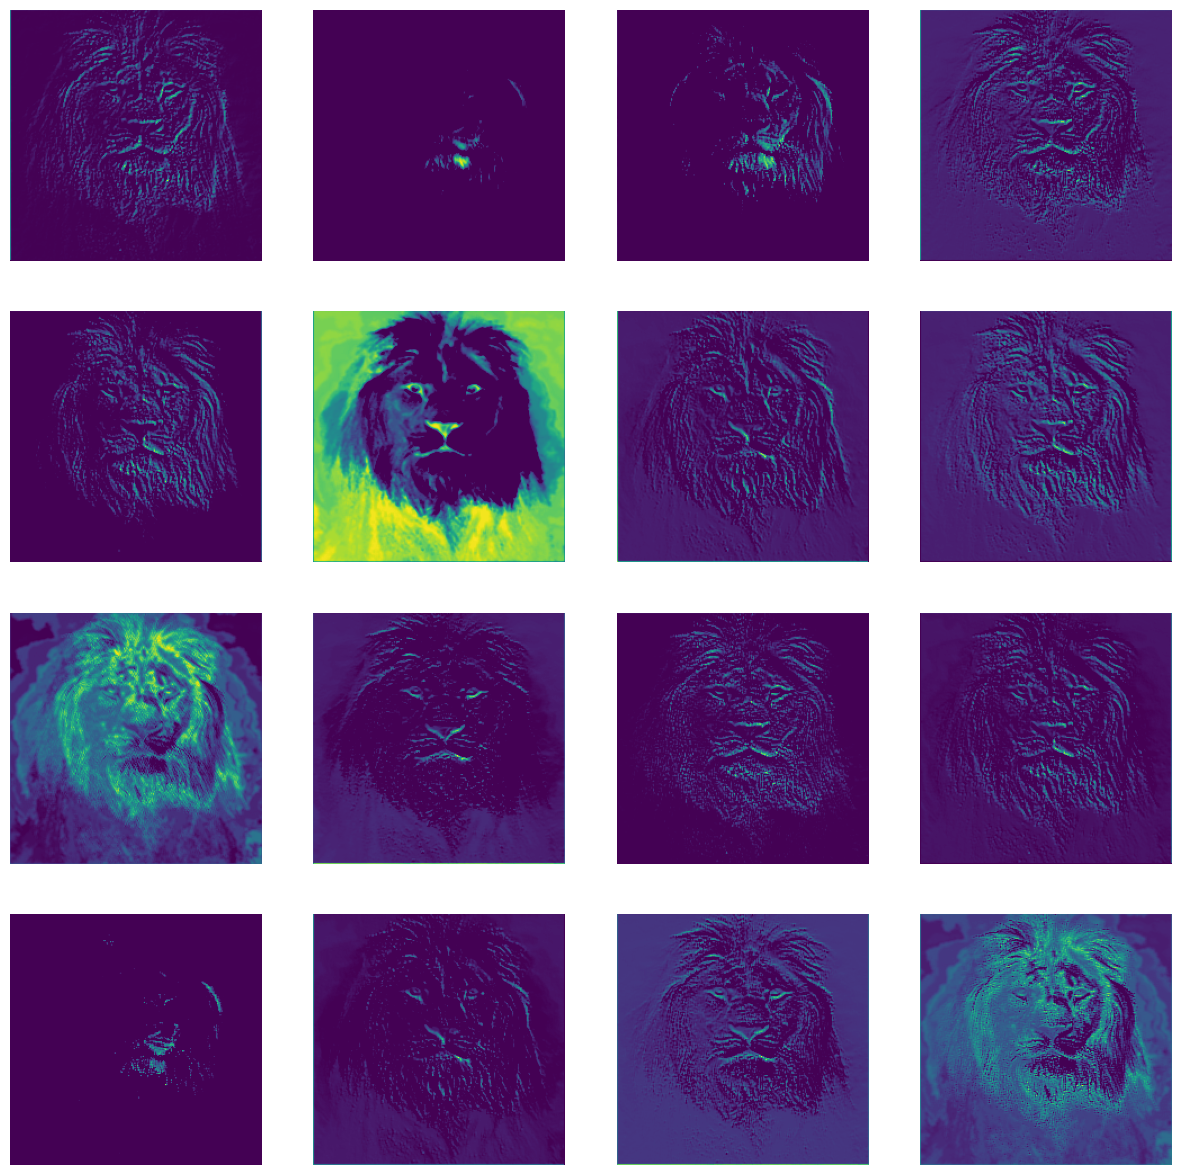

In [8]:
f1 = extracted_feature[1]
print('\n f1.shape: ', f1.shape, 'Layer: ', layers_name[1])
imgs = f1[0,:,:]
plt.figure(figsize = (15, 15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')

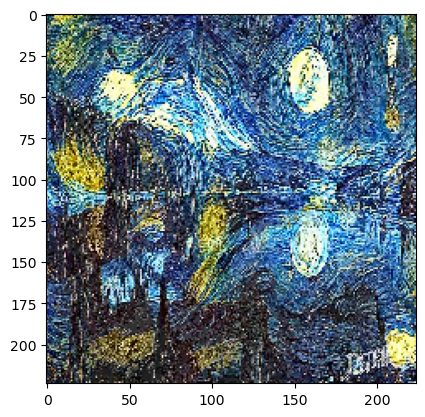

In [74]:
image_path = 'style.jpg'
img = image.load_img(image_path, target_size = (224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [10]:
extracted_feature = feature_model(x)


 f1.shape:  (1, 224, 224, 64) Layer:  block1_conv1


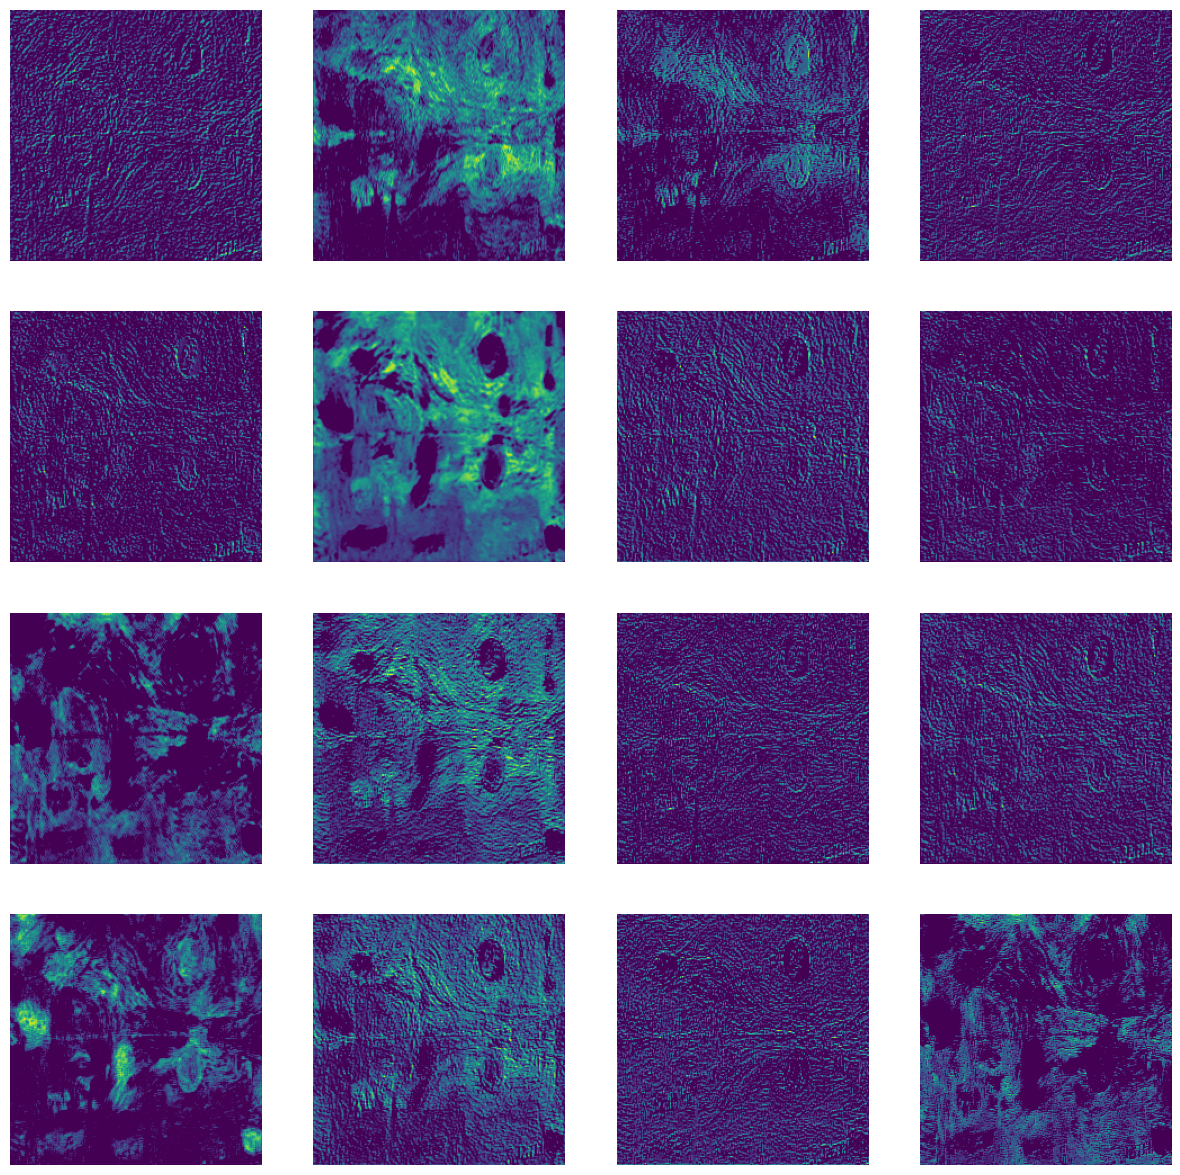

In [15]:
f1 = extracted_feature[1]
print('\n f1.shape: ', f1.shape, 'Layer: ', layers_name[1])
imgs = f1[0,:,:]
plt.figure(figsize = (15, 15))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')

In [45]:
# Step 1: Load the image
image = Image.open('style.jpg').convert('L')  # Convert to grayscale

# Step 2: Convert the image to a NumPy array
image_array = np.array(image, dtype=np.float32)

# Step 3: Compute the dot product with its transpose
dot_product_image = np.dot(image_array, image_array.T)

# Normalize the resulting image for visualization
dot_product_image = (dot_product_image - dot_product_image.min()) / (dot_product_image.max() - dot_product_image.min()) * 255

# Convert back to uint8
dot_product_image = dot_product_image.astype(np.uint8)

# Step 4: Save or display the result
result_image = Image.fromarray(dot_product_image)
result_image.save('dot_product_image.jpg')


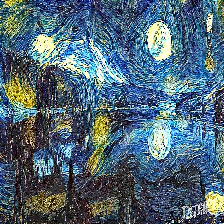

In [87]:
image_path = 'style.jpg'
img = image.load_img(image_path, target_size = (224, 224))
# Convert the image to a NumPy array
img_array = image.img_to_array(img)
img

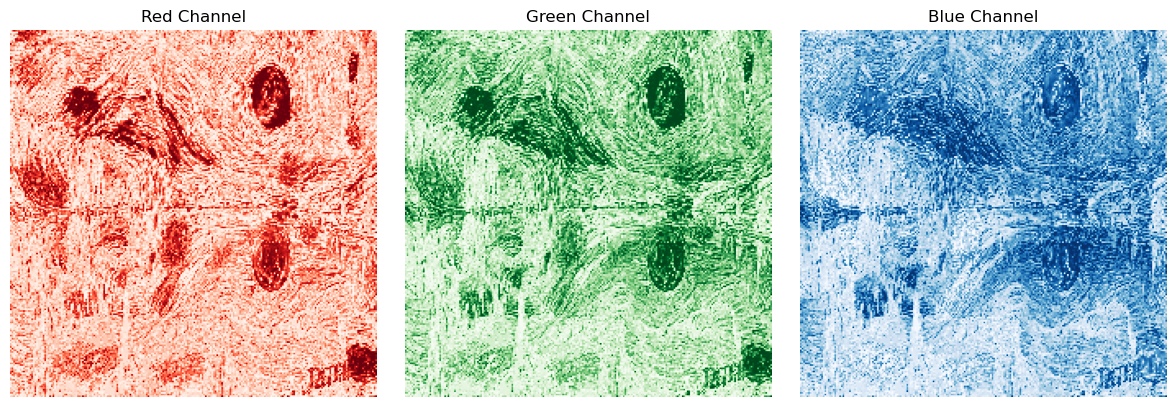

In [88]:
# Split the channels
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# Create a figure to display the channels
plt.figure(figsize=(12, 4))

# Red channel
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

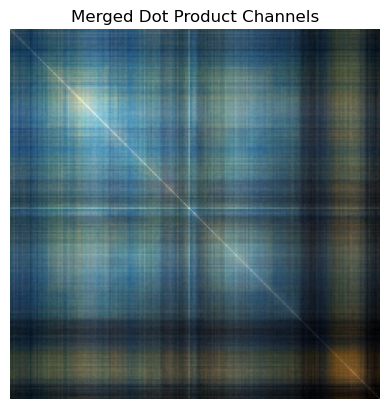

In [97]:
new_red_image = np.dot(red_channel, red_channel.T)
new_green_image = np.dot(green_channel, green_channel.T)
new_blue_image = np.dot(blue_channel, blue_channel.T)
# Normalize the resulting images
new_red_image = (new_red_image - np.min(new_red_image)) / (np.max(new_red_image) - np.min(new_red_image)) * 255
new_green_image = (new_green_image - np.min(new_green_image)) / (np.max(new_green_image) - np.min(new_green_image)) * 255
new_blue_image = (new_blue_image - np.min(new_blue_image)) / (np.max(new_blue_image) - np.min(new_blue_image)) * 255

# Convert to uint8
new_red_image = new_red_image.astype(np.uint8)
new_green_image = new_green_image.astype(np.uint8)
new_blue_image = new_blue_image.astype(np.uint8)

# Merge the channels into a single RGB image
merged_image = np.zeros((new_red_image.shape[0], new_red_image.shape[1], 3), dtype=np.uint8)
merged_image[..., 0] = new_red_image  # Red channel
merged_image[..., 1] = new_green_image  # Green channel
merged_image[..., 2] = new_blue_image  # Blue channel

# Show the merged image
plt.imshow(merged_image)
plt.title('Merged Dot Product Channels')
plt.axis('off')
plt.show()

In [44]:
# Create the 'gram' folder if it doesn't exist
output_dir = 'gram'
os.makedirs(output_dir, exist_ok=True)

# Path to the images folder
images_dir = 'gram_matrices'

# Iterate through all images in the images directory
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
        # Load the image
        img_path = os.path.join(images_dir, filename)
        # Step 1: Load the image
        image = Image.open(img_path).convert('L')  # Convert to grayscale

        # Step 2: Convert the image to a NumPy array
        image_array = np.array(image, dtype=np.float32)
        
        # Step 3: Compute the dot product with its transpose
        dot_product_image = np.dot(image_array, image_array.T)
        
        # Normalize the resulting image for visualization
        dot_product_image = (dot_product_image - dot_product_image.min()) / (dot_product_image.max() - dot_product_image.min()) * 255
        
        # Convert back to uint8
        dot_product_image = dot_product_image.astype(np.uint8)
        
        # Step 4: Save or display the result
        result_image = Image.fromarray(dot_product_image)
        result_image.save('dot_product_image.jpg')
        gram_image_path = os.path.join(output_dir, f'gram_{filename}')
        plt.imsave(gram_image_path, result_image, cmap='gray')
        # img = Image.open(img_path).convert('RGB')  # Convert to RGB if not already
        # img_array = np.array(img)

        # # Compute the dot product (Gram matrix)
        # gram_matrix = np.dot(img_array.reshape(-1, 3).T, img_array.reshape(-1, 3))

        # # Normalize the Gram matrix for visualization
        # gram_matrix = (gram_matrix - np.min(gram_matrix)) / (np.max(gram_matrix) - np.min(gram_matrix))
        # gram_matrix *= 255  # Scale to 0-255
        # gram_matrix = gram_matrix.astype(np.uint8)  # Convert to uint8

        # # Save the Gram matrix as an image
        # gram_image_path = os.path.join(output_dir, f'gram_{filename}')
        # plt.imsave(gram_image_path, gram_matrix, cmap='gray')

print(f"Gram images saved to the '{output_dir}' folder.")

Gram images saved to the 'gram' folder.
